<a href="https://colab.research.google.com/github/sharonma1218/stats-306/blob/main/hw03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages("tidyverse")
install.packages("nycflights13")
library(tidyverse)
library(nycflights13)
options(repr.plot.width=5, repr.plot.height=4)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# STATS 306
## Homework 3:  Advanced `dplyr` and tidy data

For each problem, enter the R code in the cell marked "YOUR SOLUTION HERE".

## Problem 1: Why so delayed? (4 points)
The following code adds a variable `week` to `flights`, such that `week==1` for the first seven days of the year, `week==2` for days 8-14, etc. (In the second half of the semester we will learn how to work with times and date data using the `lubridate` package.)

In [ ]:
flights_week = mutate(flights, week=lubridate::week(time_hour))

**(a)** Make a bar plot of the proportion of flights each week whose actual departure time is NOT missing. The x-axis of your plot should contain the weeks of the year, ranging from 1 to 52, and the y-axis of your plot should be a number between 0 and 1 showing the decimal proportion of flights that have a departure time. What sort of plot geometry (line, bar, point, histogram, etc.) do you think is appropriate for this kind of plot? Does anything about this plot jump out at you? What and why? *1 point*

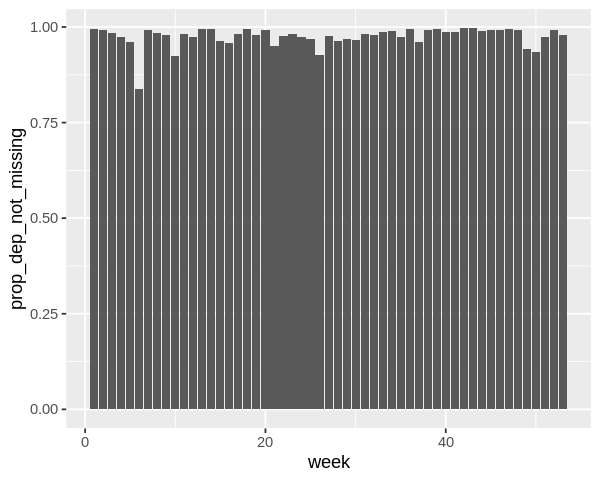

In [ ]:
# Solution: 
flights_week%>%
  mutate(dep_time_not_missing=as.integer(!is.na(dep_time)))%>%
  group_by(week)%>%
  summarize(prop_dep_not_missing=mean(dep_time_not_missing))%>%
  ggplot(aes(x=week,y=prop_dep_not_missing))+
  geom_bar(stat="identity")
# I think a bar chart is the most appropriate b/c we want to see the proportions for each week.
# Week 6 in this plot jumps out at me b/c it has the highest proportion of missing departure times.

**(b)** For the week with the highest fraction of missing departure times, generate a table which shows the proportion of missing departure times for each day of that week. Your table should have columns `year`, `month`, `day`, and `prop_miss_dep_time`. Sort your table in chronological order and store it in a variable called `table1b`. *1 point*

In [ ]:
# Solution
table1b<-flights_week%>%
  filter(week==6)%>%
  group_by(year,month,day)%>%
  mutate(dep_time_not_missing=as.integer(!is.na(dep_time)))%>%
  summarize(prop_dep_not_missing=mean(dep_time_not_missing))
print(table1b)

`summarise()` has grouped output by 'year', 'month'. You can override using the
`.groups` argument.


# A tibble: 7 × 4
# Groups:   year, month [1]
   year month   day prop_dep_not_missing
  <int> <int> <int>                <dbl>
1  2013     2     5                0.982
2  2013     2     6                0.991
3  2013     2     7                0.996
4  2013     2     8                0.492
5  2013     2     9                0.425
6  2013     2    10                0.969
7  2013     2    11                0.921


**(c)** 2 days in `table1b` should jump out at you. What you're discovering from the data is the [North American Blizzard of 2013](https://en.wikipedia.org/wiki/February_2013_North_American_blizzard). Many flights were cancelled due to extreme weather conditions. Identify the proportion of cancelled flights out of LaGuardia Airport (LGA) during the days that jumped out at you for each airline carrier in descending order. *1 point*

In [ ]:
# Solution:
# 2 days in table1b jump out to me: 2/8/13 & 2/9/13.
# This is b/c many flights were cancelled due to the North American Blizzard of '13.
flights_week%>%
  filter(week==6 & month==2 & day==c(8,9) & origin=="LGA")%>%
  group_by(year,month,day,origin,carrier)%>%
  mutate(dep_time_not_missing=as.integer(!is.na(dep_time)))%>%
  summarize(prop_dep_not_missing=mean(dep_time_not_missing))%>%
  arrange(day, prop_dep_not_missing)

`summarise()` has grouped output by 'year', 'month', 'day', 'origin'. You can
override using the `.groups` argument.


year,month,day,origin,carrier,prop_dep_not_missing
<int>,<int>,<int>,<chr>,<chr>,<dbl>
2013,2,8,LGA,9E,0.0000000
2013,2,8,LGA,EV,0.0000000
2013,2,8,LGA,YV,0.0000000
2013,2,8,LGA,FL,0.2500000
2013,2,8,LGA,UA,0.3636364
2013,2,8,LGA,DL,0.4666667
2013,2,8,LGA,F9,0.5000000
2013,2,8,LGA,WN,0.5555556
2013,2,8,LGA,US,0.5714286


**(d)** In your own words, summarize your findings from the previous exercises. Most importantly, comment on which airlines were the most and least cautious in terms of flight cancellations. Can you think of any reason why this might be? *1 point*

In [ ]:
# The airlines that were the most cautious on 2/8/13 were 9E, EV, & YV; in the sense that ALL flights were cancelled during the blizard.
# But these are smaller airlines, so it might've been easier to cancel all of their fewer flights. 
# The airlines that were the most cautious on 2/9/13 were US, MQ, & FL, but there were still some flights. 
# I think this is b/c most airlines eased off by the second day of the blizzard. 
# This is evident by EV having ALL flights running on 2/9/13. 
# The least cautious for both dates may be AA & WN since they had the highest proportions of flights still running on 2/8/13 & 2/9/13. 
# But on the flip side of things, these are larger airlines, so it would've been hard for them to cancel all of their flights, 
# & these flights may have occurred in Southern America, where the blizzard was not a problem. 

## Problem 2: Graduate school admissions (4 points)
This problem studies a built-in dataset called `UCBAdmissions`. It contains graduate school admissions data from 1973 for six departments at UC Berkeley:

In [ ]:
data(UCBAdmissions)
ucb <- as_tibble(UCBAdmissions) %>% print

# A tibble: 24 × 4
   Admit    Gender Dept      n
   <chr>    <chr>  <chr> <dbl>
 1 Admitted Male   A       512
 2 Rejected Male   A       313
 3 Admitted Female A        89
 4 Rejected Female A        19
 5 Admitted Male   B       353
 6 Rejected Male   B       207
 7 Admitted Female B        17
 8 Rejected Female B         8
 9 Admitted Male   C       120
10 Rejected Male   C       205
# … with 14 more rows


(For privacy reasons the names of the departments have been changed to `A`, `B`, ... , `F`.)

**(a)**
Using the tool we learned for summarizing and manipulating tidy data, create a summary table from `ucb` which shows the acceptance rate by gender. Your table should have 5 columns: `Department`, `Gender`, `Admitted`, `Rejected`, and `Proportion Admitted`. Store it in a variable called `table3a`. *1 point*

<table>
<thead><tr><th scope="col">Department</th><th scope="col">Gender</th><th scope="col">Admitted</th><th scope="col">Rejected</th><th scope="col">Proportion_Admitted</th></tr></thead>
<tbody>
	<tr><td>A</td> <td>Female   </td><td> &dash;     </td><td>&dash;     </td><td>&dash;</td></tr>
	<tr><td>A</td> <td>Male   </td><td> &dash;     </td><td>&dash;     </td><td>&dash;</td></tr>
		<tr><td>B</td> <td>Female   </td><td> &dash;     </td><td>&dash;     </td><td>&dash;</td></tr>
			<tr><td>B</td> <td>Male   </td><td> &dash;     </td><td>&dash;     </td><td>&dash;</td></tr>
				<tr><td>C</td> <td>Female   </td><td> &dash;     </td><td>&dash;     </td><td>&dash;</td></tr>
					<tr><td>C</td> <td>Male   </td><td> &dash;     </td><td>&dash;     </td><td>&dash;</td></tr>
						<tr><td>D</td> <td>Female   </td><td> &dash;     </td><td>&dash;     </td><td>&dash;</td></tr>
							<tr><td>D</td> <td>Male   </td><td> &dash;     </td><td>&dash;     </td><td>&dash;</td></tr>
								<tr><td>E</td> <td>Female   </td><td> &dash;     </td><td>&dash;     </td><td>&dash;</td></tr> 	<tr><td>E</td> <td>Male   </td><td> &dash;     </td><td>&dash;     </td><td>&dash;</td></tr> 	<tr><td>F</td> <td>Female   </td><td> &dash;     </td><td>&dash;     </td><td>&dash;</td></tr> 	<tr><td>F</td> <td>Male   </td><td> &dash;     </td><td>&dash;     </td><td>&dash;</td></tr>
</tbody>
</table>

(A few entries have been provided for you; your job is to write code that will produce the complete table with no blanks.)

In [ ]:
# Solution: 

ucb2<-ucb%>%
  pivot_wider(names_from=Admit,values_from=n)%>%
  select(Dept,Gender,Admitted,Rejected)

table3a<-ucb2%>%
  mutate(Proportion_Admitted=Admitted/(Admitted+Rejected))%>%
  print

# A tibble: 12 × 5
   Dept  Gender Admitted Rejected Proportion_Admitted
   <chr> <chr>     <dbl>    <dbl>               <dbl>
 1 A     Male        512      313              0.621 
 2 A     Female       89       19              0.824 
 3 B     Male        353      207              0.630 
 4 B     Female       17        8              0.68  
 5 C     Male        120      205              0.369 
 6 C     Female      202      391              0.341 
 7 D     Male        138      279              0.331 
 8 D     Female      131      244              0.349 
 9 E     Male         53      138              0.277 
10 E     Female       94      299              0.239 
11 F     Male         22      351              0.0590
12 F     Female       24      317              0.0704


**(b)**
In STATS 250 you [learned](https://www.youtube.com/watch?v=6gfMhsWmnwk) how to test for differences in proportions between two populations. Apply this to part (a) `table3a`. Was the overall proportion of men admitted statistically different from that of women? Perform an appropriate test and interpret your findings. What do these result suggest about admissions practices at UC Berkeley in the early 1970s? *1 point*

(Hint: use the `prop.test()` function.)

In [ ]:
# Solution

by_gender=table3a%>%
  group_by(Gender)%>%
  summarize(Total_Admitted=sum(Admitted),
Total_People=sum(Admitted+Rejected),
Prop_Admitted=Total_Admitted/Total_People)%>%
  print

prop.test(c(557,1198),c(1835,2691))

# From the table itself, you can see that the proportion of men admitted is larger than that of women.
# To confirm whether this difference is significant, I conducted a 2-sample test,
# in which the null hypothesis is that the male and female populations are the same.
# However, the p-value is almost 0, which is less than 0.05, so we can reject this null.
# i.e. The overall proportion of men admitted is statistically different from that of women.
# These results suggest that admissions practices at UC Berkely in the early 1970s may not have taken gender equality into consideration. 

# A tibble: 2 × 4
  Gender Total_Admitted Total_People Prop_Admitted
  <chr>           <dbl>        <dbl>         <dbl>
1 Female            557         1835         0.304
2 Male             1198         2691         0.445



	2-sample test for equality of proportions with continuity correction

data:  c(557, 1198) out of c(1835, 2691)
X-squared = 91.61, df = 1, p-value < 2.2e-16
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.1703022 -0.1129887
sample estimates:
   prop 1    prop 2 
0.3035422 0.4451877 


**(c)**
Reproduce the table from Problem 1, but now stratify by department. 
Compute the male and female acceptance proportion for each department separately. *1 point*

Your resulting table should look like:


<table>
<thead><tr><th scope="col">Dept</th><th scope="col">Female_Admitted</th><th scope="col">Female_Rejected</th><th scope="col">Male_Admitted</th><th scope="col">Male_Rejected</th><th scope="col">Male_Proportion_Admitted</th><th scope="col">Female_Proportion_Admitted</th></tr></thead>
<tbody>
	<tr><td>A         </td><td> 89      </td><td> &dash;       </td><td>&dash;       </td><td>&dash;       </td><td>&dash;</td><td>&dash;</td></tr>
	<tr><td>B         </td><td> &dash;       </td><td>  &dash;       </td><td>353</td><td>&dash;       </td><td>&dash;</td><td>&dash;</td></tr>
	<tr><td>C         </td><td> &dash;       </td><td>  391	     </td><td>&dash;</td><td>&dash;       </td><td>&dash;</td><td>&dash;</td></tr>
	<tr><td>D         </td><td> &dash;       </td><td>  &dash;       </td><td>&dash;</td><td>&dash;       </td><td>0.33093525	</td><td>&dash;</td></tr>
	<tr><td>E         </td><td> &dash;       </td><td>  &dash;       </td><td>&dash;</td><td>138       </td><td>&dash;</td><td>&dash;</td></tr>
 	<tr><td>F         </td><td> &dash;       </td><td>  &dash;       </td><td>&dash;</td><td>&dash;       </td><td>&dash;</td><td>0.07038123</td></tr>

</tbody>
</table>

(Again, a few table entries have been provided to help you check your work, and it is your job to provide code that computes the entire table automatically.)

In [ ]:
# Solution 
table3a%>%
  pivot_wider(names_from=Gender,values_from=c(Admitted,Rejected,Proportion_Admitted))%>%
  select(Dept,Admitted_Female,Rejected_Female,Admitted_Male,Rejected_Male,Proportion_Admitted_Male,Proportion_Admitted_Female)%>%
  rename(Female_Admitted=Admitted_Female,Female_Rejected=Rejected_Female,Male_Admitted=Admitted_Male,Male_Rejected=Rejected_Male,Male_Proportion_Admitted=Proportion_Admitted_Male,Female_Proportion_Admitted=Proportion_Admitted_Female)

Dept,Female_Admitted,Female_Rejected,Male_Admitted,Male_Rejected,Male_Proportion_Admitted,Female_Proportion_Admitted
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A,89,19,512,313,0.62060606,0.82407407
B,17,8,353,207,0.63035714,0.68000000
C,202,391,120,205,0.36923077,0.34064081
D,131,244,138,279,0.33093525,0.34933333
E,94,299,53,138,0.27748691,0.23918575
F,24,317,22,351,0.05898123,0.07038123


**(d)**
Do the department-level findings in part (c) agree or disagree with what you concluded in part (b)? Which departments agree with your conclusion in part (b) and which disagree? **Explain with numerical evidence for full credit.** *1 point*

In [ ]:
# Solution:
# Not all departments agree w/ what I concluded in b. 
# Depts C & E had a higher proportion of males admitted, but 
# Depts A,B,D,&F had a higher proportion of females admitted. 

## Problem 3: Popular Baby Names of the Decade (2 points)
Recall from lecture the `babynames` dataset that contains a lot of information about frequency of baby names over time.

In [ ]:
install.packages("babynames")
library(babynames)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



**(a)** Generate a table that has **decade** on the vertical axis, and the most popular male **and** female name of each decade. A decade will be definied by the years ___0 - ___9. So for example, 1880-1889 is a decade followed by 1890-1899, etc. *1 point*

Hint: The `cut()` function can be used to "discretize" a continuous variable by placing each continuous observation into a bin. For example:

In [ ]:
v = 1:10  # vector of the numbers 1 through 10
cut(v, breaks=c(0, 5, 10))

[1] (0,5]  (0,5]  (0,5]  (0,5]  (0,5]  (5,10] (5,10] (5,10] (5,10] (5,10]
Levels: (0,5] (5,10]

converts the vector $v=(1, \dots, 10)$ into a *factor* (discrete variable) that has two levels: $(0,5]$ and $(5, 10]$.

In [ ]:
# Solution 

# Create Decades
babynames$decade<-cut(babynames$year,breaks=c(1879,1889,1899,1909,1919,1929,1939,1949,1959,1969,1979,1989,1999,2009,2019))

# Most Popular Male Names
df1<-babynames%>%
  filter(sex=="M")%>%
  group_by(decade)%>%
  slice(which.max(n))

# Most Popular Female Names
df2<-babynames%>%
  filter(sex=="F")%>%
  group_by(decade)%>%
  slice(which.max(n))

# Combined, Over the Decades 
df3<-merge(df1,df2,"decade")%>%
  select(decade,name.x,name.y)%>%
  rename(Male="name.x",Female="name.y")%>%
  print

                decade    Male   Female
1  (1.88e+03,1.89e+03]    John     Mary
2   (1.89e+03,1.9e+03]    John     Mary
3  (1.91e+03,1.92e+03]    John     Mary
4  (1.92e+03,1.93e+03]  Robert     Mary
5  (1.93e+03,1.94e+03]  Robert     Mary
6  (1.94e+03,1.95e+03]   James    Linda
7  (1.95e+03,1.96e+03] Michael    Linda
8  (1.96e+03,1.97e+03] Michael     Lisa
9  (1.97e+03,1.98e+03] Michael Jennifer
10 (1.98e+03,1.99e+03] Michael Jennifer
11    (1.99e+03,2e+03] Michael  Jessica
12  (1.9e+03,1.91e+03]    John     Mary
13 (2.01e+03,2.02e+03]   Jacob Isabella
14    (2e+03,2.01e+03]   Jacob    Emily


**(b)** Do any names appear more than once? Write code that converts the table from part (a) into a dataframe with all the names that show up more than once. **Manual answers will not receive credit. Your code should automatically convert the table to a new one showing the duplicated names.** *1 point*

In [ ]:
# Solution
# Method 1 
df3%>%
  filter(Male=="John"|Female=="Mary"|Male=="Robert"|Male=="Michael"|Female=="Jennifer"|Male=="Jacob")
# Method 2 
df3[duplicated(df3$Male)|duplicated(df3$Male,fromLast=TRUE),]

decade,Male,Female
<fct>,<chr>,<chr>
"(1.88e+03,1.89e+03]",John,Mary
"(1.89e+03,1.9e+03]",John,Mary
"(1.91e+03,1.92e+03]",John,Mary
"(1.92e+03,1.93e+03]",Robert,Mary
"(1.93e+03,1.94e+03]",Robert,Mary
"(1.95e+03,1.96e+03]",Michael,Linda
"(1.96e+03,1.97e+03]",Michael,Lisa
"(1.97e+03,1.98e+03]",Michael,Jennifer
"(1.98e+03,1.99e+03]",Michael,Jennifer


,decade,Male,Female
,<fct>,<chr>,<chr>
1,"(1.88e+03,1.89e+03]",John,Mary
2,"(1.89e+03,1.9e+03]",John,Mary
3,"(1.91e+03,1.92e+03]",John,Mary
4,"(1.92e+03,1.93e+03]",Robert,Mary
5,"(1.93e+03,1.94e+03]",Robert,Mary
7,"(1.95e+03,1.96e+03]",Michael,Linda
8,"(1.96e+03,1.97e+03]",Michael,Lisa
9,"(1.97e+03,1.98e+03]",Michael,Jennifer
10,"(1.98e+03,1.99e+03]",Michael,Jennifer
